# Predicting Premier League Matches - Machine Learning Project


By Satyen Sabnis

I have always love watching football or how Americans pronounce it "soccer" ever since I was a child. I remember begging my parents to get the sports package that had all the soccer matches I wanted to watch. FIFA world cups were a very memorable part of my childhood watching with my cousins from India. They also introduced me to other football leagues the EPL or English Premier League in particular. I remember blindy supporting Arsenal since my cousins were such a big fan. Since then my love for soccer has grown and I regularly tune into the Saturday and Sunday matches in the Premier League. I still support Arsenal all these years later, but I always find myself being nervous for these important matches. Could their be a way I could predict the outcome of a upcoming Arsenal match to prepare myself for Arsenal to choke another game? In this project I will build a machine learning model to predict an outcome of a premier league game. The dataset I will be using is from Kaggle and is Premier League Team stats from 2020-2023. 

Dataset: https://www.kaggle.com/datasets/toluabbass/premier-league-team-stats-2023-2020?resource=download

Import Neccessary Libraries

In [439]:
import pandas as pd

import numpy as np

Read/View Data

In [475]:
df = pd.read_csv("matches.csv")

df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
152,1,2022-08-06,12:30,Premier League,Matchweek 1,Sat,Away,D,2,2,...,Match Report,NaN,11.0,3.0,12.4,0.0,0.0,0.0,2023,Liverpool
153,2,2022-08-15,20:00,Premier League,Matchweek 2,Mon,Home,D,1,1,...,Match Report,NaN,24.0,4.0,17.4,0.0,0.0,0.0,2023,Liverpool
154,3,2022-08-22,20:00,Premier League,Matchweek 3,Mon,Away,L,1,2,...,Match Report,NaN,17.0,5.0,14.4,0.0,0.0,0.0,2023,Liverpool
155,4,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,9,0,...,Match Report,NaN,19.0,12.0,11.6,0.0,0.0,0.0,2023,Liverpool
156,5,2022-08-31,20:00,Premier League,Matchweek 5,Wed,Home,W,2,1,...,Match Report,NaN,23.0,6.0,17.8,0.0,0.0,0.0,2023,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,48,2021-05-08,20:15,Premier League,Matchweek 35,Sat,Home,W,2,0,...,Match Report,NaN,14.0,6.0,13.6,0.0,0.0,0.0,2021,Liverpool
1630,49,2021-05-13,20:15,Premier League,Matchweek 34,Thu,Away,W,4,2,...,Match Report,NaN,17.0,8.0,14.9,0.0,0.0,0.0,2021,Liverpool
1631,50,2021-05-16,16:30,Premier League,Matchweek 36,Sun,Away,W,2,1,...,Match Report,NaN,26.0,6.0,18.3,1.0,0.0,0.0,2021,Liverpool
1632,51,2021-05-19,20:15,Premier League,Matchweek 37,Wed,Away,W,3,0,...,Match Report,NaN,20.0,3.0,16.2,1.0,0.0,0.0,2021,Liverpool


Look More Into The Data

In [476]:
df.info

<bound method DataFrame.info of       Unnamed: 0        date   time            comp         round  day venue  \
0              1  2022-08-07  16:30  Premier League   Matchweek 1  Sun  Away   
1              2  2022-08-13  15:00  Premier League   Matchweek 2  Sat  Home   
2              3  2022-08-21  16:30  Premier League   Matchweek 3  Sun  Away   
3              4  2022-08-27  15:00  Premier League   Matchweek 4  Sat  Home   
4              5  2022-08-31  19:30  Premier League   Matchweek 5  Wed  Home   
...          ...         ...    ...             ...           ...  ...   ...   
2275          38  2021-05-02  19:15  Premier League  Matchweek 34  Sun  Away   
2276          39  2021-05-08  15:00  Premier League  Matchweek 35  Sat  Home   
2277          40  2021-05-16  19:00  Premier League  Matchweek 36  Sun  Away   
2278          41  2021-05-19  18:00  Premier League  Matchweek 37  Wed  Away   
2279          42  2021-05-23  16:00  Premier League  Matchweek 38  Sun  Home   

     re

In [477]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

I will remove columns I know are unecessary and should be removed.

In [478]:
df = df.drop(columns = ['notes','match report','comp', 'attendance'])

Check for Null Values

In [479]:
df.isna().sum()

Unnamed: 0    0
date          0
time          0
round         0
day           0
venue         0
result        0
gf            0
ga            0
opponent      0
xg            0
xga           0
poss          0
captain       0
formation     0
referee       0
sh            0
sot           0
dist          1
fk            0
pk            0
pkatt         0
season        0
team          0
dtype: int64

In [480]:
df.dropna(subset = ['dist'], inplace = True)

# Preliminary Analysis And Visualization Using PowerBI and Pandas


I will first start of my doing some preliminary analysis to get to know more about the data and potentially identify any patterns and relevant predictors. I will be using PowerBI and pandas to do some basic analysis and visualization.

I will first start of by looking at the teams who have the most wins, most draws, and most losses. Also, I will take the number of matches into account to find the teams with the highest relative frequency of each outcome; Win, Loss, and Draw.

In [481]:
outcome_by_team = df.groupby(['team', 'result']).size().unstack(fill_value = 0)

In [482]:
outcome_by_team['w_freq'] = round((outcome_by_team['W']) / (outcome_by_team['W'] + outcome_by_team['L'] + outcome_by_team['D']), 2) 
outcome_by_team['l_freq'] = round((outcome_by_team['L']) / (outcome_by_team['W'] + outcome_by_team['L'] + outcome_by_team['D']), 2)
outcome_by_team['d_freq'] = round((outcome_by_team['D']) / (outcome_by_team['W'] + outcome_by_team['L'] + outcome_by_team['D']), 2) 

In [483]:
outcome_by_team[['W', 'D', 'L','w_freq']].sort_values(by = 'w_freq', ascending = False).head()

result,W,D,L,w_freq
team,,,,
Manchester City,84,16,14,0.74
Liverpool,67,27,20,0.59
Arsenal,66,16,32,0.58
Manchester United,60,27,27,0.53
Tottenham Hotspur,58,19,37,0.51


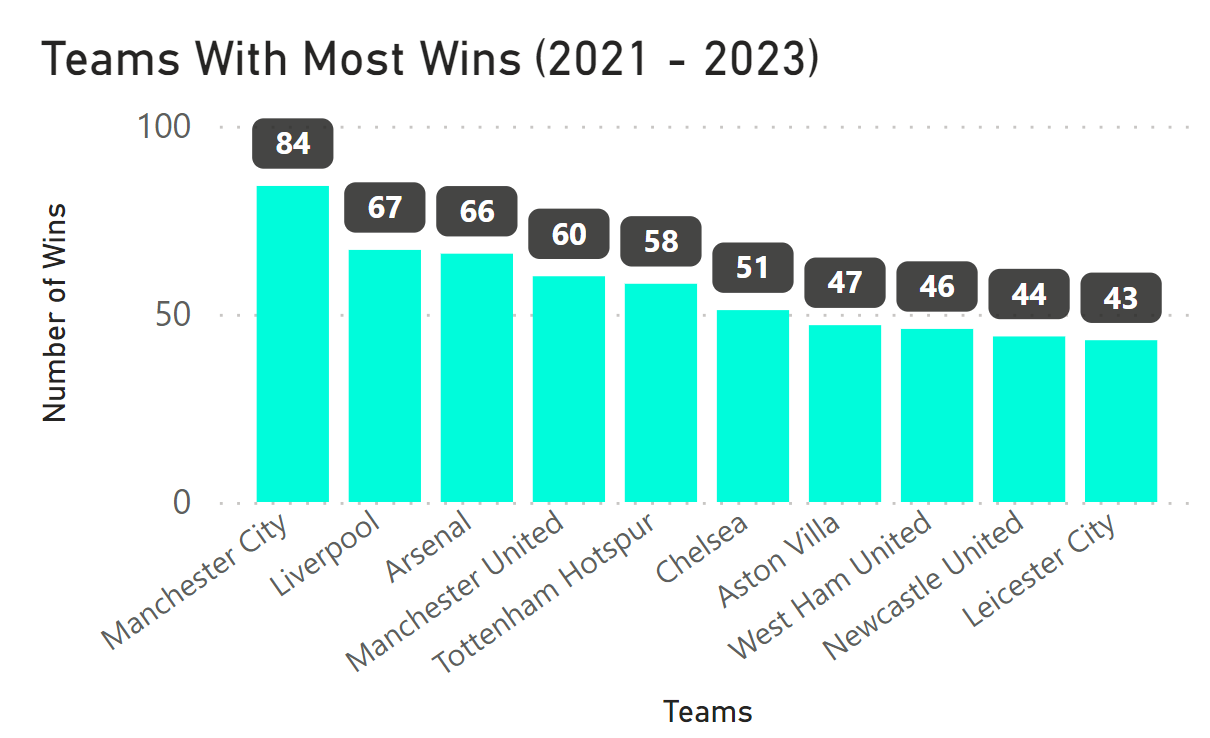

In [484]:
outcome_by_team[['W', 'D', 'L','d_freq']].sort_values(by = 'd_freq', ascending = False).head()

result,W,D,L,d_freq
team,,,,
Brighton and Hove Albion,39,37,38,0.32
Burnley,17,23,36,0.30
Crystal Palace,34,34,45,0.30
Newcastle United,44,33,37,0.29
West Bromwich Albion,5,11,22,0.29


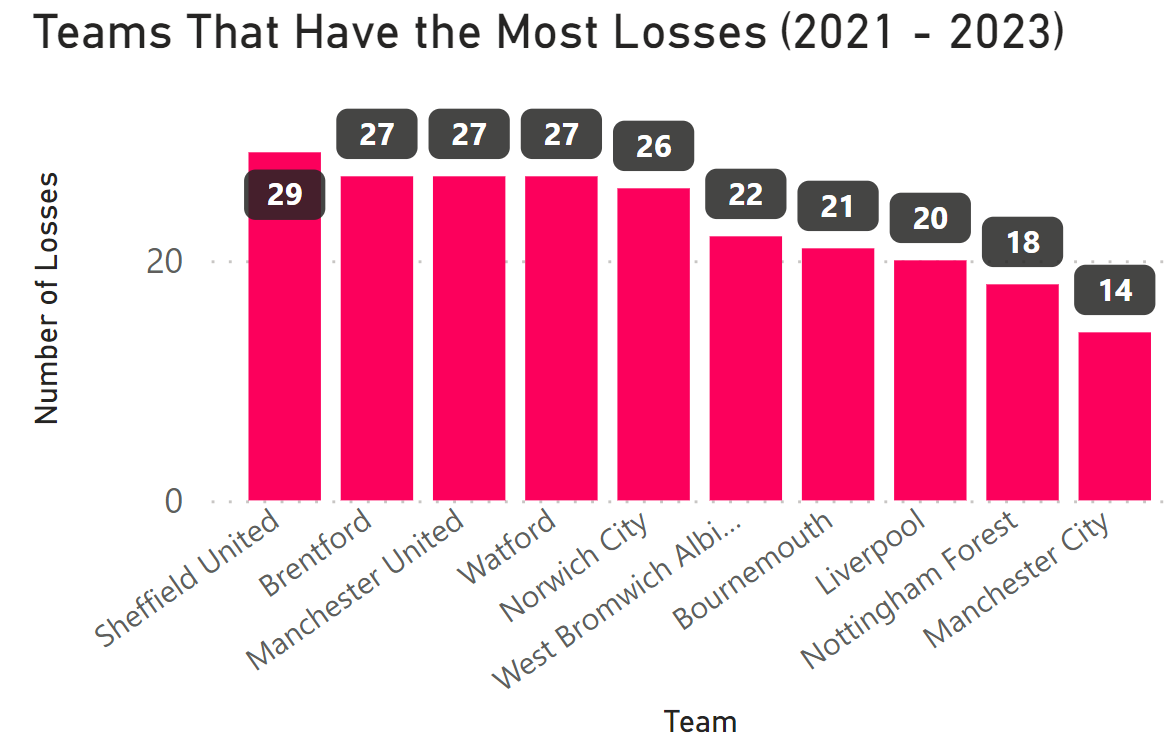

In [485]:
outcome_by_team[['W', 'D', 'L','l_freq']].sort_values(by = 'l_freq', ascending = False).head()

result,W,D,L,l_freq
team,,,,
Sheffield United,7,2,29,0.76
Watford,6,5,27,0.71
Norwich City,5,7,26,0.68
West Bromwich Albion,5,11,22,0.58
Bournemouth,11,6,21,0.55


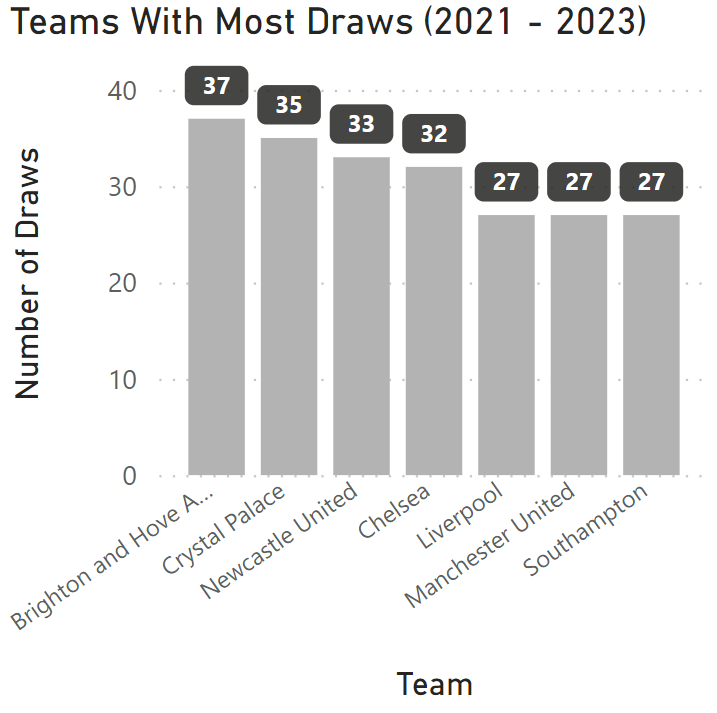

Considering the 2021 - 2023 timeframe, some noteworthy teams to point out that win relatively often are; **Manchester City**, **Liverpool**, and **Arsenal**. Teams that tend to draw **Brighton and Hove Albion**, **Crystal Palace**, and **Newcastle United**. Teams that tend to lose are **Sheffield United**, **Watford**, and **West Bromwich Albion**. All this to say when building our machine learning model the team and opponent team name will probably be relavant predictors to our model since each team outcomes are varied.

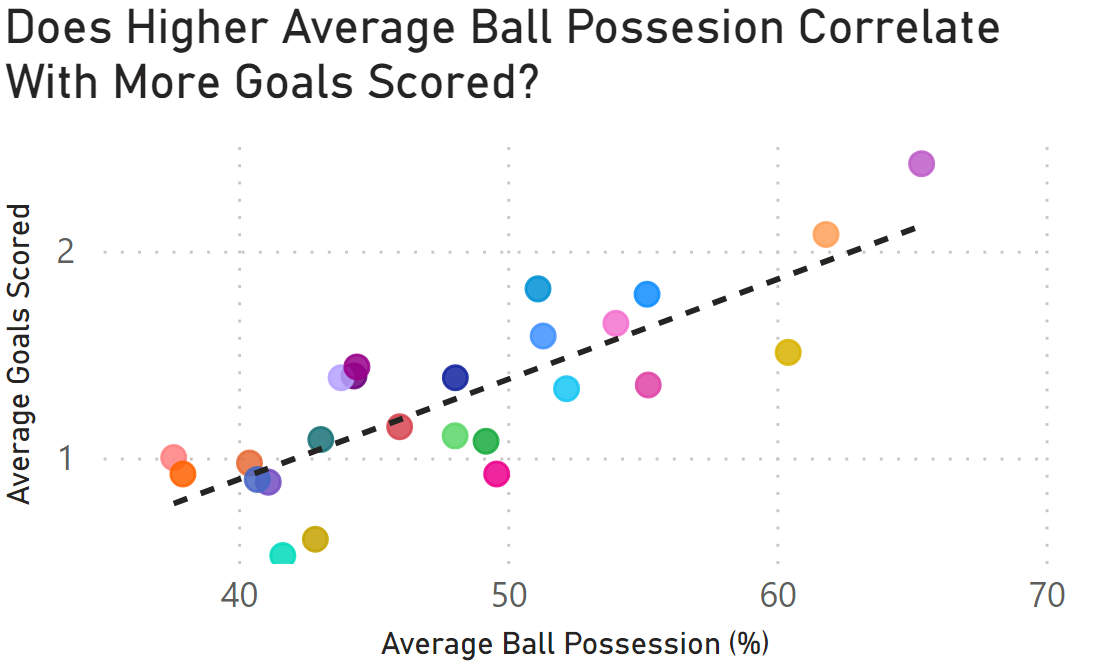

I wanted to explore more variables so I looked at the correlation between ball possession and average goals scores and as you would expect higher ball posession is linked with higher average goals scored which could possibly lead to more amount of wins

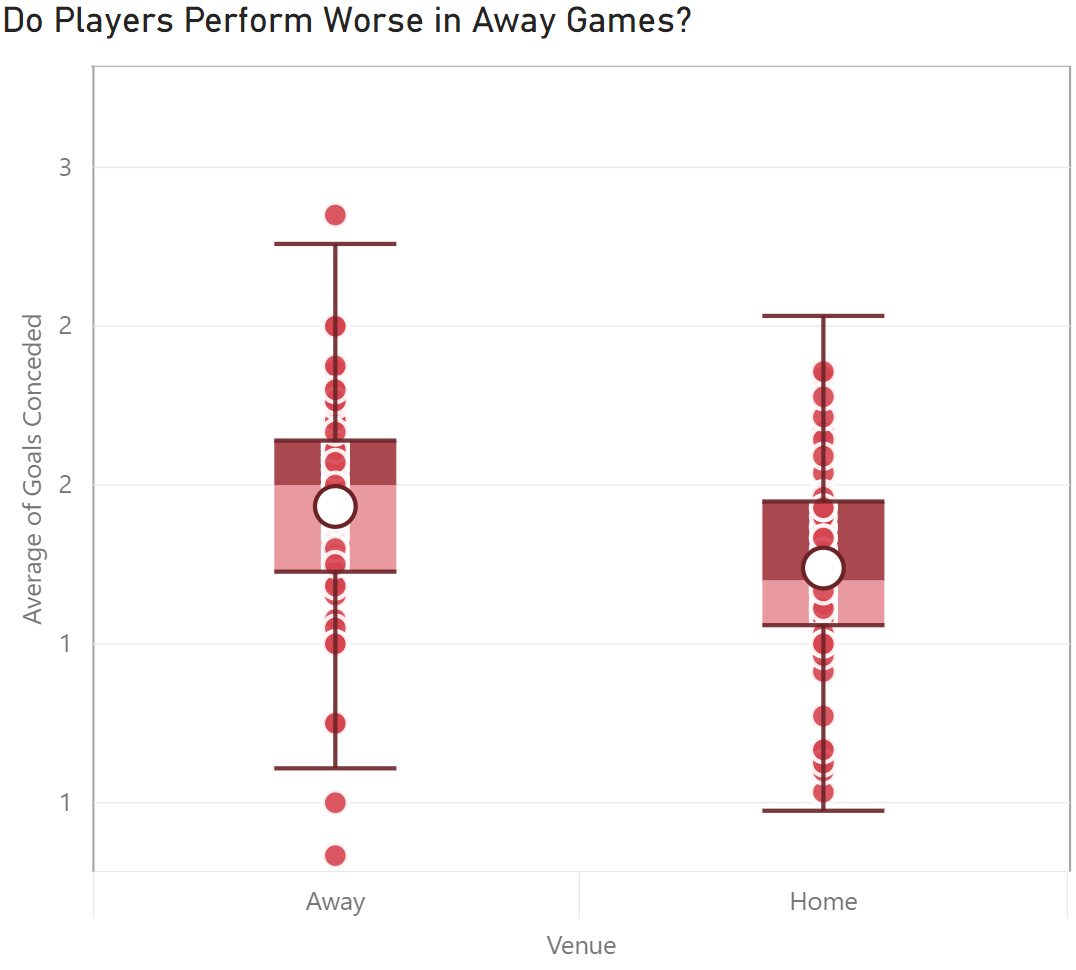

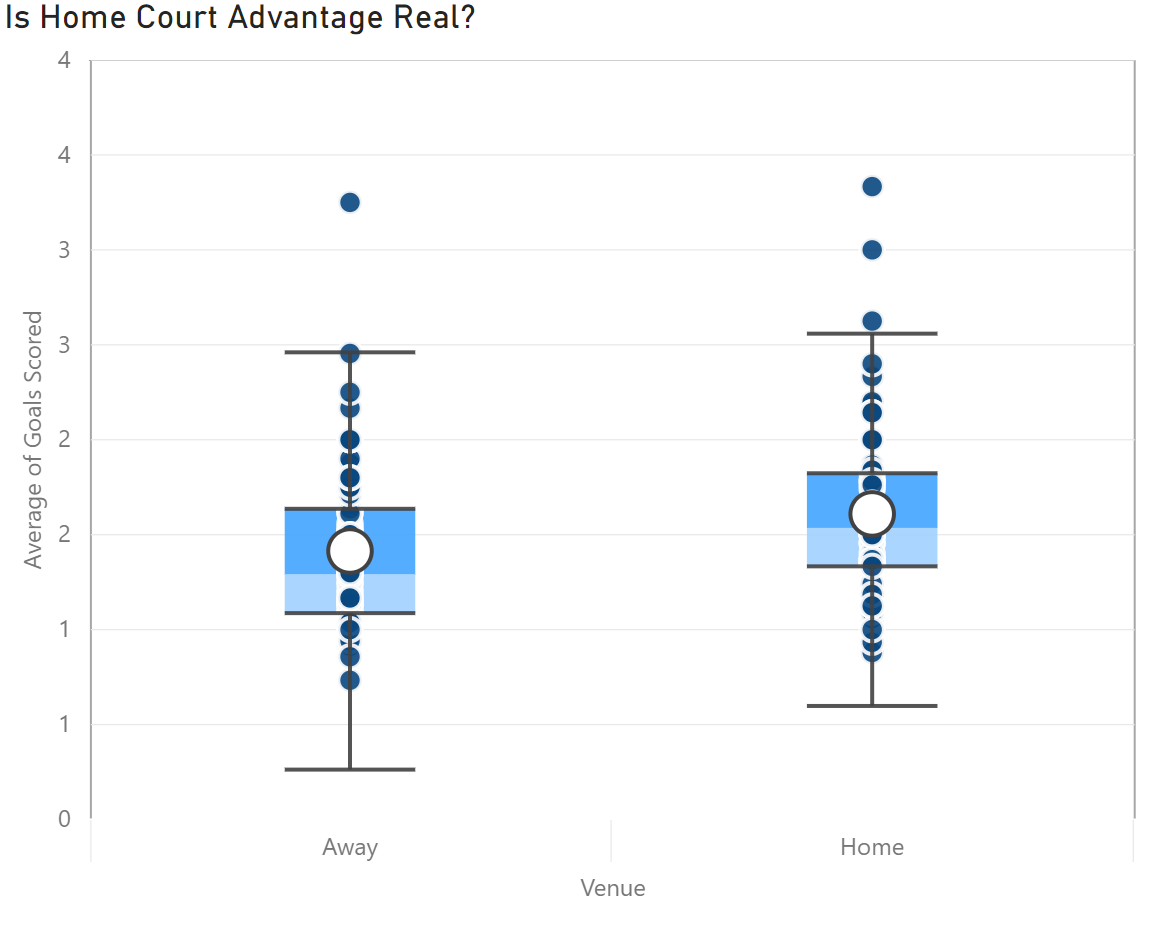

Many people state that players that play in their home court tend to play better. Though we cannot anwser this question with simple visualizations we can see their is a slightly higher average number of goals scored when the team played in their home court than in a away game. Typically one of the ways we indicated a team's performance is the number of goals they scored. Conversely players playing in an away court conceded slighly more goals than than in an home court. Though number of goals scored and the outcome of the game arent the same thing, whether the team plays in a **home** or **away** court couble be relevant to their performance and how well/bad they do in a game.

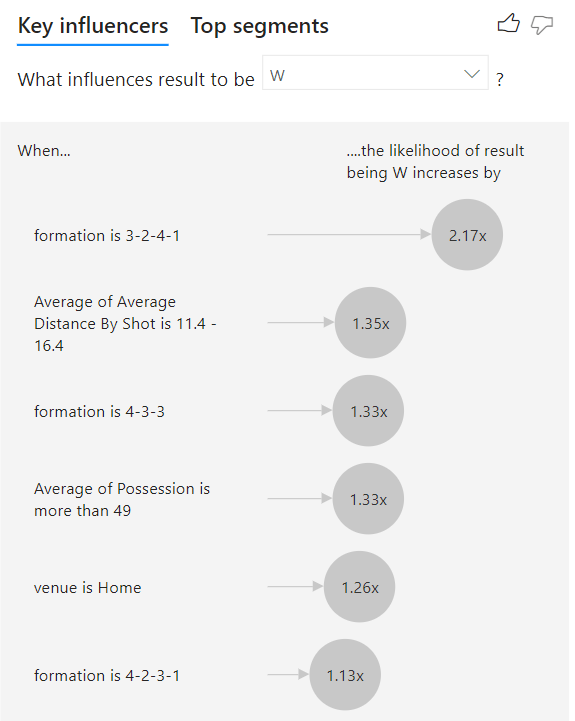

In PowerBI, you can look at some **key influencers** that can affect a variable, in our case this will be the outcome of a match. Looking at some of these variables it seems that **formation** the team plays in could be relevant predictor. This makes sense since each formation has its own strengths and weaknesses and a more versatile formation could lead to more wins. Another predictor that stood out is the **average distance by shot**. The distance that the player/team shoots a ball could effect the outcome of the game. Players that shoot from a distance have less of a chance of scoring since it can be more easily caught and cleared and their is more of a chance it misses. A team who consistenly shoots from this far distance has less of a chance of making goals and thus winning games. Teams who consistently shoot near the goal post have a higher chance to score and win more games. Also, when the venue is in a team's home court the likelihood of it resulting in a win is slightly higher. This backs our statements made above of where venue is a relevant predictor.

# Identifying Relevant Predictors And Building Machine Learning Model

What we have analyzed so far has been purely based on visualization and not actual statistics and machine learning. Though we have made some educated guesses on what we think could be some usefull predictors lets now use knowledge of statistics and machine learning to identify actual usefull predictors.

PreProcessing

In [486]:
df.dtypes

Unnamed: 0      int64
date           object
time           object
round          object
day            object
venue          object
result         object
gf              int64
ga              int64
opponent       object
xg            float64
xga           float64
poss          float64
captain        object
formation      object
referee        object
sh            float64
sot           float64
dist          float64
fk            float64
pk            float64
pkatt         float64
season          int64
team           object
dtype: object

**Since our models only work with numerical data we need to convert it into a numeric representation**

In [487]:

df['venue'] = df['venue'].apply(lambda x: 0 if x == "Home" else 1)

In [488]:
df['day'] = df['day'].apply(lambda x: {'Sat': 0, 'Sun': 1, 'Mon': 2, 'Tue': 3, 'Wed': 4, 'Thu': 5, 'Fri': 6}[x])

Some the opponent team names are abbreviated, since we are gonna use these as predictors we want the team and opponent names to match up. Thus we will create a **mapping** to achieve this.

In [489]:
matched_team_names = {
    'Brighton' : 'Brighton and Hove Albion',
    'Sheffield Utd': 'Sheffield United',
    'West Brom': 'West Bromwich Albion',
    'Nott\'ham Forest': 'Nottingham Forest',
    'Manchester Utd': 'Manchester United',
    'Newcastle Utd' : 'Newcastle United',
    'Tottenham' : 'Tottenham Hotspur',
    'West Brom' : 'West Bromwich Albion',
    'West Ham' : 'West Ham United',
    'Wolves' : 'Wolverhampton Wanderers'
}

df['opponent'] = df['opponent'].replace(matched_team_names)

In [490]:
df['result'] = df['result'].apply(lambda x: 2 if x == "W" else (1 if x == "D" else 0))

Convert the team and opponent names to numeric values, we want to make sure they are encoded with the same integer value

In [491]:
unique_teams = np.unique(df[['team', 'opponent']])

encoding = np.arange(len(unique))
df[['team', 'opponent']] = df[['team', 'opponent']].replace(unique_teams, encoding)

In [492]:
df['time'] = df['time'].apply(lambda x: int(x[:2]))

Lets start by building a **baseline model** that uses minimal/basic predictors that we can improve on

In [458]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = df[['time', 'day', 'venue', 'opponent', 'team']]
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 50)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)

print(report)

Accuracy: 0.39473684210526316
              precision    recall  f1-score   support

           0       0.48      0.46      0.47       179
           1       0.18      0.24      0.21        92
           2       0.46      0.41      0.43       185

    accuracy                           0.39       456
   macro avg       0.37      0.37      0.37       456
weighted avg       0.41      0.39      0.40       456



We start of with a relatively poor accuracy score of around 36%, which is just barely better than guessing a loss, draw, or win. Looking at the predictions more closely we can see that it does a good job of predicting losses relative to the other outcomes. As expected predicting draws is pretty difficult. To improve on this model lets add in more predictors that we discussed in our preliminary analysis and some other predictors that could be relevant to the result of a game. We will also use more complex machine learning models to improve our accuracy 

We add in the possession percentage, the number of shots, shots on target, free kicks, and two particular usefull predictors I also brought in from the data is expected goals(xG) and expected goals against (xGA) which are statistics used in football to measure the quality of scoring chances. These predictors y measure the likelihood of a goal which consider factors like; Distance to the goal, angle to the goal, body part with which the shot was taken , etc. These are very helpfull to us because they include alot of very relevant information that goes into goal scoring. To have these values already calculated helps us improve our accuracy in predicting match results. I excluded the goals scored and conceded from the predictors since this would predict the outcome very easily. We want to predict outcomes based on general statistics of a team like the ball possesion, shots taken, etc otherwise

**Ensemble Model: Random Forest**

In [461]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()

X = df[['time', 'day', 'venue', 'opponent', 'team','poss','sh','sot','fk', 'xg','xga']]

X = scaler.fit_transform(X.values)
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

paramater_grid = {
    'n_estimators': [50, 100, 200, 250],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10, 115],
    'min_samples_leaf': [1, 2, 4, 8]
}

model = RandomForestClassifier()

grid_search_rf = GridSearchCV(model, paramater_grid, cv = 5, scoring= "accuracy")
grid_search_rf.fit(X_train, y_train)

highest_accuracy_rf = grid_search_rf.best_score_
best_estimator_rf = grid_search_rf.best_params_

print("Accuracy:", highest_accuracy_rf)
print("Best parameter:", best_estimator_rf)

Accuracy: 0.6249215413901321
Best parameter: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 250}


In [462]:
y_pred_rf = grid_search_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(accuracy_rf)

report = classification_report(y_test, y_pred_rf)

print(report)

0.6192982456140351
              precision    recall  f1-score   support

           0       0.63      0.72      0.68       223
           1       0.10      0.01      0.02       116
           2       0.62      0.83      0.71       231

    accuracy                           0.62       570
   macro avg       0.45      0.52      0.47       570
weighted avg       0.52      0.62      0.56       570



**Gradient Boosting Classifier**

In [463]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

model = GradientBoostingClassifier()

grid_search_gbc = GridSearchCV(model, param_grid, cv = 5, scoring= "accuracy")
grid_search_gbc.fit(X_train, y_train)

highest_accuracy_gbc = grid_search_gbc.best_score_
best_estimator_gbc = grid_search_gbc.best_params_

print("Accuracy:", highest_accuracy_gbc)
print("Best parameter:", best_estimator_gbc)

Accuracy: 0.6225806451612903
Best parameter: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [464]:
y_pred_gbc = grid_search_gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)

print(accuracy_gbc)

report = classification_report(y_test, y_pred_gbc)

print(report)

0.612280701754386
              precision    recall  f1-score   support

           0       0.65      0.73      0.68       223
           1       0.24      0.08      0.12       116
           2       0.63      0.77      0.70       231

    accuracy                           0.61       570
   macro avg       0.51      0.52      0.50       570
weighted avg       0.56      0.61      0.57       570



**Nueral Network**

In [465]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 10)

model_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(524, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model_nn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])


model_nn.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_data = [X_val, y_val]) 
model_nn.evaluate(X_test, y_test)

Epoch 1/20
54/54 [==============================] - 1s 7ms/step - loss: 0.8950 - accuracy: 0.5840 - val_loss: 0.8933 - val_accuracy: 0.5860
Epoch 2/20
54/54 [==============================] - 0s 4ms/step - loss: 0.8198 - accuracy: 0.6290 - val_loss: 0.8938 - val_accuracy: 0.5965
Epoch 3/20
54/54 [==============================] - 0s 4ms/step - loss: 0.8034 - accuracy: 0.6390 - val_loss: 0.9006 - val_accuracy: 0.5825
Epoch 4/20
54/54 [==============================] - 0s 4ms/step - loss: 0.7868 - accuracy: 0.6454 - val_loss: 0.9330 - val_accuracy: 0.5544
Epoch 5/20
54/54 [==============================] - 0s 4ms/step - loss: 0.7737 - accuracy: 0.6589 - val_loss: 0.9225 - val_accuracy: 0.5754
Epoch 6/20
54/54 [==============================] - 0s 4ms/step - loss: 0.7542 - accuracy: 0.6671 - val_loss: 0.8939 - val_accuracy: 0.5860
Epoch 7/20
54/54 [==============================] - 0s 4ms/step - loss: 0.7376 - accuracy: 0.6805 - val_loss: 0.9328 - val_accuracy: 0.5930
Epoch 8/20
54/54 [==

[1.8217453956604004, 0.5473684072494507]

I tried three complex models in machine learning ultimately though the neural network did the best since its validation loss was low, thus the neural network most likely overfit the data. So, the best model was the Gradient Boosting Classifier with these parameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50} and it gave an accuracy of around 62% which is better than our baseline model. Looking at more metrics besides accuracy like the precision and recall it did very well in predicting wins and losses. With both a high precision and recall score, but it did poorly in predicting draws. This was consistent among all the models I tried and it makes sense since predicting draws is very hard to do. I would have to explore more complex models, tune hyperparameters, and identify/create new predictors to better improve this accuracy. But overall the model did ok in predicting wins and losses. Now that we have build the model lets predict results of some upcoming Arsenal Games.

# Predicting Upcoming Arsenal Games

Since our model takes in some predictors that only are known after the game is over we want to provide data from previous games or averages to input as our predictors. For example for our free kick predictor we will input the average/overall free kicks arsenal is kicking per match when we are predicting future games. Teams will tend to play how they played in their previous games. 

Lets start of by scraping some relevant arsenal statistics data from the 2023-2024 Premier League. 

In [466]:
import requests
url = "https://footystats.org/clubs/arsenal-fc-59"

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

tables = pd.read_html(r.text)

In [467]:
arsenal_stats_2024 = tables[0]

arsenal_stats_2024

,Stats,Overall,At Home,At Away
0,Wins,70%,77%,64%
1,Draws,15%,15%,14%
2,Losses,15%,8%,21%
3,xG For / Match,1.87,2.07,1.69
4,xG Against / Match,0.90,0.87,0.94
5,Scored / Match,2.52,2.62,2.43
6,Conceded / Match,0.85,0.92,0.79
7,AVG (Match Goals Average),3.37,3.54,3.21
8,Clean Sheets %,41%,31%,50%
9,Failed to Score %,11%,8%,14%


Predicting Arsenal vs Sheffield United and that is happening on May 4, 2023. Manually inputting data to speed up process. In reality you would want to scrap this but due to time constraints I will be manually inputting the data from some stats above and from the internet 

In [497]:
arsenal_predictors = {
    'time': [20,20],
    'day':[1,2],
    'venue':[0,1],
    'opponent':[15,18], #NewCastle and  Sheffield United
    'team':[0,0], #Arsenal
    'poss':[62,62.0],
    'sh':[11.38,11.38],
    'sot':[5.85,5.85],
    'fk':[0,0],
    'xg': [1.69,1.69],
    'xga':[0.94,0.94]
}

predict_val = pd.DataFrame(arsenal_predictors)
X = predict_val[['time', 'day', 'venue', 'opponent', 'team','poss','sh','sot','fk', 'xg','xga']]
X_test = scaler.fit_transform(X.values)

In [499]:
pred = grid_search_gbc.predict(X_test)
print(pred)

[2 2]


I wanted to predict two games one which happened recently which was Arsenal vs Newcastle and then a upcoming game today which is Arsnel vs Sheffield United. It correctly predicted that Arsenal would beat Newcastle and it has predicted that Arsenal will beat Sheffield United today. We will see if that will be true!

# Conclusion/Next Steps

I used historical premier league football data from 2021-2023 and build a machine learning model that would predict wins, losses, and draws. Our final model was able to predict match results with a relatively ok accuracy of 62% but this can be improved. It was able to predict wins and losses pretty well but struggled on predicting draws which makes sense since this can be a compex task. I also predicted a recent and future Arsenal match and the model predicted that Arsenal will win. Yay! Some next steps I could take with more time is using the rolling mean of the predictors which will take into account the performance of teams in its past few games. I saw this approach used by someone and it led them to having a higher probability. Also, to streamline the process more I should make a function which automatically scraps the data for the inputed team and opponent and makes predictions rather than the manual way I did. I could also try tuning some hyperparameters and using more complex models to improve accuracy.